# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

## Step 0: Load The Data

Use this link to download the data used for this project [Link to Data](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)

In [1]:
# Load pickled data
import pickle
import numpy as np
import cv2
import csv
import tensorflow as tf
import glob
import matplotlib.pyplot as plt


training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

### Include an exploratory visualization of the dataset

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape =  (X_test.shape[1],  X_test.shape[1])
# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(test['labels']) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


In [3]:
class_names = []
with open('signnames.csv','rt')as f:
    data = csv.reader(f)
    for row in data:
        sign_name = list(row)[1]
        if(sign_name != 'SignName'):
            class_names.append(sign_name)

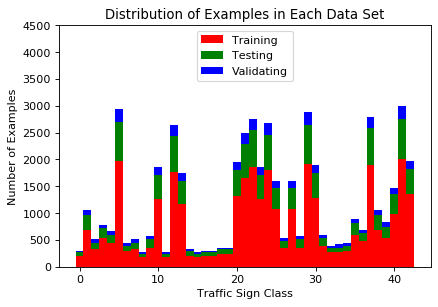

In [4]:
def print_distribution(y_train, y_test, y_valid):
    distribution = {}
    sign_class = []
    sign_num = [[],[],[]]
    
    for image in y_train:
        if(distribution.get(class_names[image]) != None):
            distribution[class_names[image]][0] = distribution[class_names[image]][0] + 1
        else:
            distribution[class_names[image]] = [0,0,0]
            
    for image in y_test:
        if(distribution.get(class_names[image]) != None):
            distribution[class_names[image]][1] = distribution[class_names[image]][1] + 1
        else:
            distribution[class_names[image]] = [0,0,0]
    
    for image in y_valid:
        if(distribution.get(class_names[image]) != None):
            distribution[class_names[image]][2] = distribution[class_names[image]][2] + 1
        else:
            distribution[class_names[image]] = [0,0,0]
            
    for x in distribution:
        sign_class.append(x)
        sign_num[0].append(distribution[x][0])
        sign_num[1].append(distribution[x][1])
        sign_num[2].append(distribution[x][2])
        
    n_classes = range(len(sign_class))
    width = 1
    plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    p1 = plt.bar(n_classes, sign_num[0], width, color='r')
    p2 = plt.bar(n_classes, sign_num[1], width, bottom=sign_num[0], color='g')
    p3 = plt.bar(n_classes, sign_num[2], width, 
             bottom=np.array(sign_num[0])+np.array(sign_num[1]), color='b')
    plt.ylabel('Number of Examples')
    plt.xlabel('Traffic Sign Class')
    plt.title('Distribution of Examples in Each Data Set')
    plt.ylim([0,4500])
    plt.legend((p1[0], p2[0], p3[0]), ('Training', 'Testing', 'Validating'), loc='upper center')
    plt.show()
    
print_distribution(y_train, y_test, y_valid)

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

In [5]:
def normalise(images):
    return images/255

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train, y_train = unison_shuffled_copies(X_train, y_train)
X_train = normalise(X_train)
X_valid = normalise(X_valid)
X_test = normalise(X_test)

### Model Architecture

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
EPOCHS = 8
history = model.fit(
    x = X_train,
    y = y_train,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
)

Train on 34799 samples, validate on 4410 samples
Epoch 1/8
34799/34799 [==============================] - 89s 3ms/sample - loss: 2.0208 - accuracy: 0.3891 - val_loss: 0.9595 - val_accuracy: 0.6989
Epoch 2/8
34799/34799 [==============================] - 117s 3ms/sample - loss: 0.5591 - accuracy: 0.8125 - val_loss: 0.3345 - val_accuracy: 0.9098
Epoch 3/8
34799/34799 [==============================] - 174s 5ms/sample - loss: 0.2760 - accuracy: 0.9100 - val_loss: 0.2791 - val_accuracy: 0.9317
Epoch 4/8
34799/34799 [==============================] - 156s 4ms/sample - loss: 0.1984 - accuracy: 0.9359 - val_loss: 0.2701 - val_accuracy: 0.9417
Epoch 5/8
34799/34799 [==============================] - 146s 4ms/sample - loss: 0.1612 - accuracy: 0.9493 - val_loss: 0.2495 - val_accuracy: 0.9531
Epoch 6/8
34799/34799 [==============================] - 130s 4ms/sample - loss: 0.1453 - accuracy: 0.9552 - val_loss: 0.3146 - val_accuracy: 0.9433
Epoch 7/8
34799/34799 [==============================] - 1

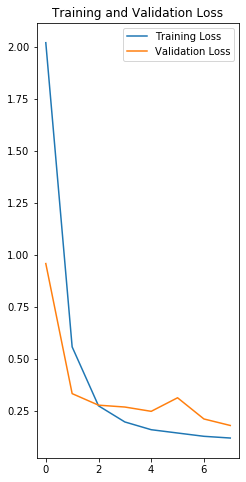

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./distribution_images/loss.png')
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

---

## Step 3: Test a Model on New Images

### Load and Output the Images and Predict the Sign Type for Each Image

Speed limit (30km/h)


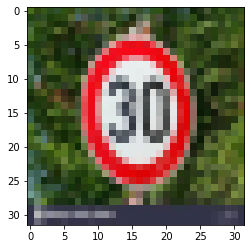

Bumpy road


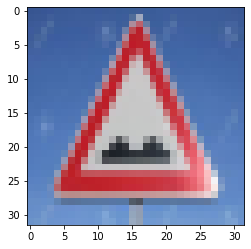

Speed limit (20km/h)


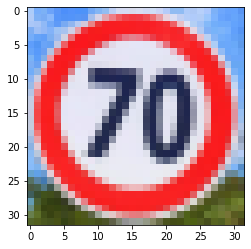

Keep right


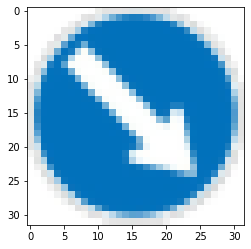

Stop


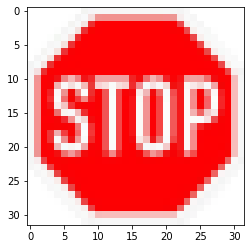

Dangerous curve to the left


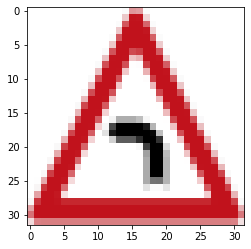

General caution


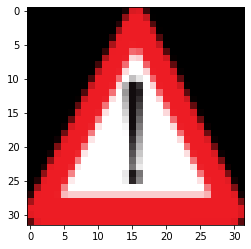

In [10]:
imgs = glob.glob('test_images/*.jpg')
imgs.extend(glob.glob('test_images/*.png'))

for img in imgs:
    cv_image = cv2.imread(img)
    image = cv_image[...,::-1]
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
    arr = np.array([image], dtype=np.float64)
    plt.imshow(image, cmap='binary')
    print(class_names[model.predict(arr).argmax()])
    plt.show()

### Analyze Performance

In [11]:
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)

12630/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [12]:
def print_class_name(array, values):
    print(values)
    for i, elem in enumerate(array):
        print(i+1, class_names[elem], ' ', end="", flush=True)
    print()

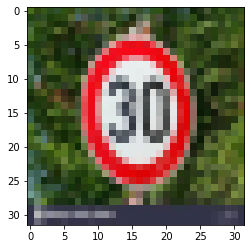

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Speed limit (30km/h)  2 Speed limit (20km/h)  3 Speed limit (50km/h)  4 Speed limit (60km/h)  5 Speed limit (70km/h)  


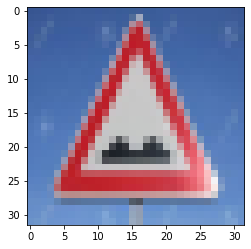

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Bumpy road  2 Speed limit (20km/h)  3 Speed limit (30km/h)  4 Speed limit (50km/h)  5 Speed limit (60km/h)  


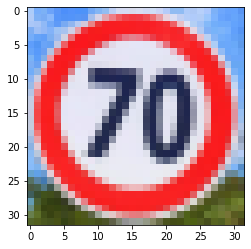

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Speed limit (20km/h)  2 Speed limit (30km/h)  3 Speed limit (50km/h)  4 Speed limit (60km/h)  5 Speed limit (70km/h)  


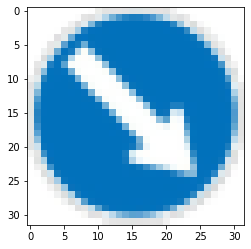

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Keep right  2 Speed limit (20km/h)  3 Speed limit (30km/h)  4 Speed limit (50km/h)  5 Speed limit (60km/h)  


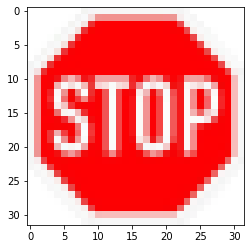

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Stop  2 Speed limit (20km/h)  3 Speed limit (30km/h)  4 Speed limit (50km/h)  5 Speed limit (60km/h)  


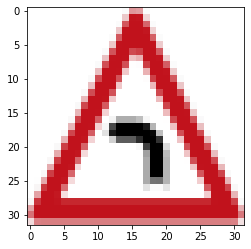

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 Dangerous curve to the left  2 Speed limit (20km/h)  3 Speed limit (30km/h)  4 Speed limit (50km/h)  5 Speed limit (60km/h)  


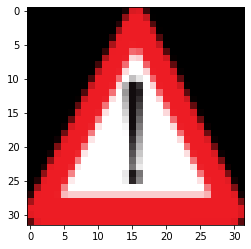

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)
1 General caution  2 Speed limit (20km/h)  3 Speed limit (30km/h)  4 Speed limit (50km/h)  5 Speed limit (60km/h)  


In [13]:
imgs = glob.glob('test_images/*.jpg')
imgs.extend(glob.glob('test_images/*.png'))

for i, img in enumerate(imgs):
    cv_image = cv2.imread(img)
    image = cv_image[...,::-1] #convert image to RGB which is our image format
    image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA) #resize test image to shape of our input model
    arr = np.array([image], dtype=np.float64)
    prediction = model.predict(arr)
    prediction = tf.squeeze(prediction).numpy()
    values = tf.nn.top_k(tf.constant(prediction), k=5).values
    test = tf.nn.top_k(tf.constant(prediction), k=5).indices
    plt.imshow(image)
    plt.show()
    print_class_name(test, values)

### Project Writeup

Explained in the [README](./README.md)